# Testing ras2dwq.py

In [1]:
import ras2dwq as wq
import numpy as np
import matplotlib.pyplot as plt

## Set up unstructred mesh

In [2]:
%%time
test_mesh = wq.main('../tests/input_files/Box-Model/BoxModel.p01.hdf', 0.1)

CPU times: total: 1.02 s
Wall time: 1.1 s


## Solve

In [3]:
input_arr = np.zeros((len(test_mesh['time']), len(test_mesh['nface'])))
input_arr[0][0] = 50

In [4]:
%%time
solved_mesh = wq.wq_simulation(test_mesh, input_arr)

CPU times: total: 93.8 ms
Wall time: 75.8 ms


In [5]:
solved_mesh

<xarray.Dataset>
Dimensions:                 (time: 11, node: 21, nface: 21, nmax_face: 4,
                             nedge: 24, 2: 2)
Coordinates:
  * time                    (time) datetime64[ns] 2022-01-01T12:00:00 ... 202...
    node_x                  (node) int32 0 3 4 6 8 3 10 ... 6 10 11 12 13 14 15
    node_y                  (node) int32 1 4 3 7 3 8 7 10 ... 14 11 15 0 4 10 9
    face_x                  (nface) float64 1.641e+06 1.641e+06 ... 1.642e+06
    face_y                  (nface) float64 6.69e+05 6.69e+05 ... 6.689e+05
Dimensions without coordinates: node, nface, nmax_face, nedge, 2
Data variables: (12/17)
    mesh2d                  int32 0
    face_nodes              (nface, nmax_face) int32 0 1 2 12 3 ... 15 9 -1 -1
    edge_nodes              (nedge, 2) int32 0 1 1 2 2 12 3 ... 13 4 14 10 15 9
    edge_face_connectivity  (nedge, 2) int32 0 3 0 1 0 9 1 ... 17 2 18 6 19 8 20
    faces_surface_area      (nface) float32 100.0 100.0 120.7 ... 0.0 0.0 0.0
    edge_velocity           (time, nedge) float32 0.0 0.0 0.0 ... 5.121 -0.0
    ...                      ...
    coeff_to_diffusion      (time, nedge) float64 0.1 0.1 0.2 ... 0.1788 0.187
    sum_coeff_to_diffusion  (time, nface) float64 0.6 0.5 ... 0.1788 0.187
    advection_coeff         (time, nedge) float64 0.0 0.0 0.0 ... 61.29 -0.0
    dt                      (time) float64 60.0 60.0 60.0 60.0 ... 60.0 60.0 nan
    ghost_volumes           (time, nface) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    load                    (time, nface) float64 83.33 0.0 0.0 ... nan nan nan

## Plot

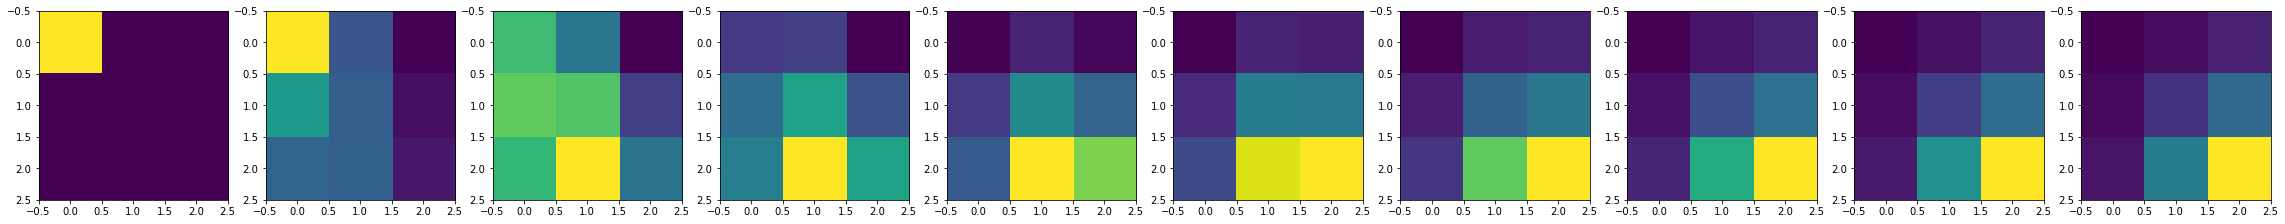

In [6]:
fig, ax = plt.subplots(1,10)
for t in range(len(solved_mesh['time']) - 1):
    ax[t].imshow(solved_mesh['load'][t].values[0:9].reshape(3,3))

fig.set_size_inches(40,5)

## Solve Alternate Scenarios

In [7]:
%%time
input_arr = np.zeros((len(test_mesh['time']), len(test_mesh['nface'])))
input_arr[0][4] = 50
solved_mesh = wq.wq_simulation(test_mesh, input_arr)

CPU times: total: 62.5 ms
Wall time: 77 ms


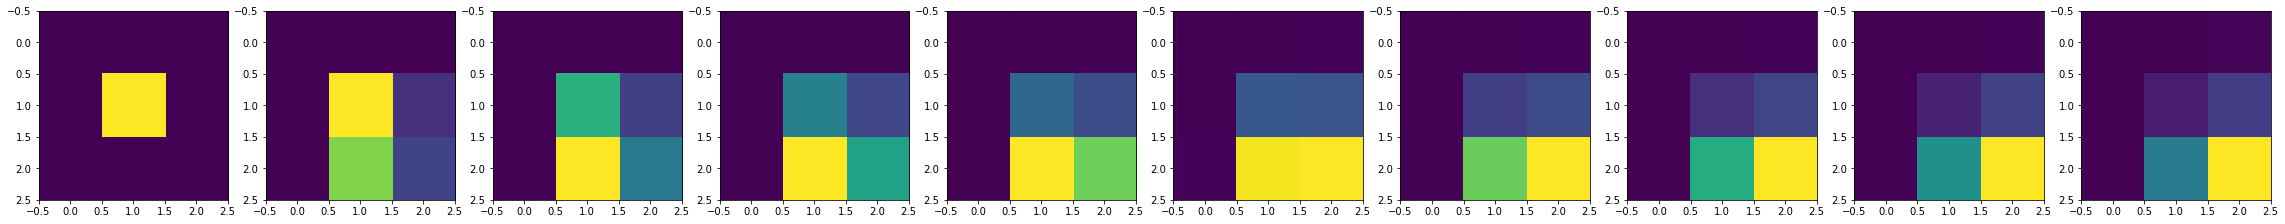

In [8]:
fig, ax = plt.subplots(1,10)
for t in range(len(solved_mesh['time']) - 1):
    ax[t].imshow(solved_mesh['load'][t].values[0:9].reshape(3,3))

fig.set_size_inches(40,5)

In [9]:
%%time
# drop something in the top left cell at t = 4
input_arr = np.zeros((len(test_mesh['time']), len(test_mesh['nface'])))
input_arr[4][0] = 50

solved_mesh = wq.wq_simulation(test_mesh, input_arr)

CPU times: total: 78.1 ms
Wall time: 65.1 ms


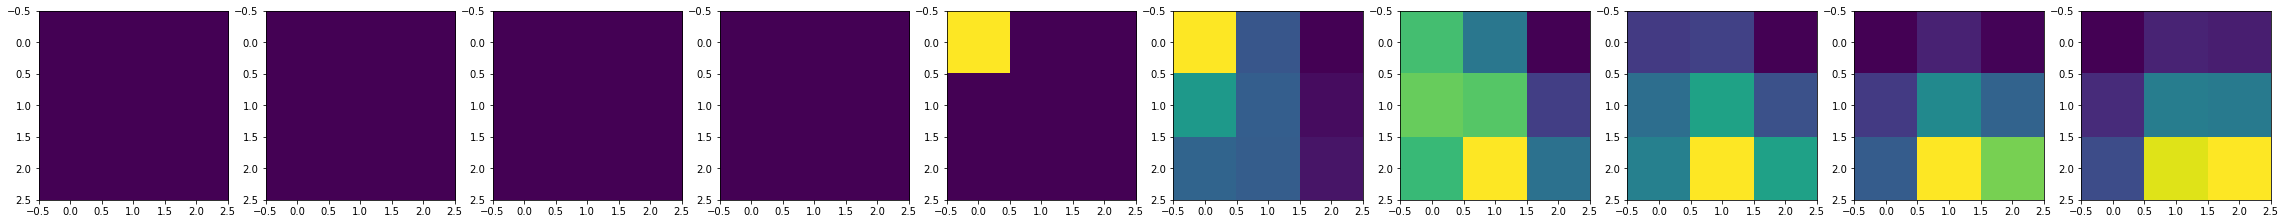

In [10]:
fig, ax = plt.subplots(1,10)
for t in range(len(solved_mesh['time']) - 1):
    ax[t].imshow(solved_mesh['load'][t].values[0:9].reshape(3,3))

fig.set_size_inches(40,5)

In [11]:
# put stuff in top left corner at 2 timesteps
input_arr = np.zeros((len(test_mesh['time']), len(test_mesh['nface'])))
input_arr[[0,5],0] = 50
solved_mesh = wq.wq_simulation(test_mesh, input_arr)

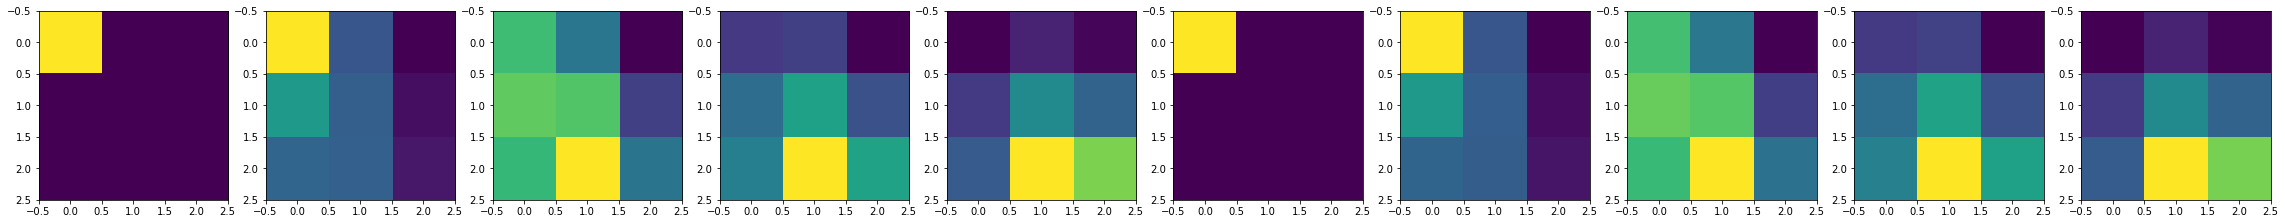

In [12]:
fig, ax = plt.subplots(1,10)
for t in range(len(solved_mesh['time']) - 1):
    ax[t].imshow(solved_mesh['load'][t].values[0:9].reshape(3,3))

fig.set_size_inches(40,5)

# Test on Muncie

In [13]:
%%time
muncie_mesh = wq.main('../tests/input_files/Muncie.p04.hdf', 0.1)

CPU times: total: 844 ms
Wall time: 844 ms


In [14]:
%%time

input_arr = np.zeros((len(muncie_mesh['time']), len(muncie_mesh['nface'])))
input_arr[38][3673] = 200

solved_mesh_muncie = wq.wq_simulation(muncie_mesh, input_arr)

CPU times: total: 6.12 s
Wall time: 6.15 s


In [15]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 15, 10

In [16]:
filenames = []
for t in range(len(muncie_mesh['time'])):
    plt.scatter(muncie_mesh['face_x'], muncie_mesh['face_y'], c=muncie_mesh['load'][t])
    plt.savefig(f'pngs/muncie-{t}.png')
    plt.clf()
    filenames.append(f'pngs/muncie-{t}.png')

<Figure size 1080x720 with 0 Axes>

In [19]:
import imageio.v3 as iio

images = list()
for file in filenames[:-1]:
    images.append(iio.imread(file))

In [20]:
iio.imwrite('gifs/muncie-example-01.gif', images)

## Alternative scenario

In [21]:
input_arr = np.zeros((len(muncie_mesh['time']), len(muncie_mesh['nface'])))
input_arr[[38, 80, 100, 150, 200],3673] = 50

In [22]:
solved_mesh_muncie = wq.wq_simulation(muncie_mesh, input_arr)

In [23]:
filenames = []
for t in range(len(muncie_mesh['time'])):
    plt.scatter(muncie_mesh['face_x'], muncie_mesh['face_y'], c=muncie_mesh['load'][t])
    plt.savefig(f'pngs/muncie-scenario2-{t}.png')
    plt.clf()
    filenames.append(f'pngs/muncie-scenario2-{t}.png')

<Figure size 1080x720 with 0 Axes>

In [24]:
import imageio.v3 as iio

images = list()
for file in filenames[:-1]:
    images.append(iio.imread(file))
    
iio.imwrite('gifs/muncie-example-02.gif', images)